In [5]:
# standard DS imports
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib as mpl
import matplotlib.pyplot as plt

# embed static images in the ipynb
%matplotlib inline 

----
<a id='TOC'></a>
# Contents

### 0. [Classes / Object-Oriented Programming](#s0)
 
### 1. [Prepare Problem](#s1)
- Load libraries
- Load dataset

### 2. [EDA](#s2)
- Descriptive statistics
- Data visualizations

### 3. [Preprocessing](#s3)
- Data Cleaning
- Feature Selection
- Data Transforms / Feature Engineering

### 4. [Evaluate Algorithms](#s4)
- Split-out validation dataset
- Test options and evaluation metric
- Spot Check Algorithms
- Compare Algorithms

### 5. [Improve Accuracy](#s5)
- Algorithm Tuning
- Ensembles

### 6. [Finalize Model](#s6)
- Predictions on validation dataset
- Create standalone model on entire training dataset
- Save model for later use

----
<a id='s0'></a>
# 0. Classes / Object-Oriented Programming

### Ex: Return the attributes of an object.
You have a few options for this. Try, `dir()` and `vars()`:

In [32]:
from sklearn.datasets import load_iris
obj = load_iris()
print(dir(obj), 'for object type: ', type(obj))

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names'] for object type:  <class 'sklearn.utils.Bunch'>


In [25]:
'hello world'

'hello world'

----
<a id='s1'></a>
# 1. 

### Ex: Load toy datasets in sklearn (from `sklearn.datasets`).

In [52]:
from sklearn import datasets

sklearn_dataset = datasets.load_breast_cancer()
dir(sklearn_dataset) # Display attributes of sklearn.utils.Bunch object

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [57]:
type(sklearn_dataset)

sklearn.utils.Bunch

In [58]:
# sklearn.utils.Bunch description
type(sklearn_dataset.DESCR)

str

In [59]:
print(sklearn_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [38]:
sklearn_dataset.data

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
sklearn

### Ex: Convert `sklearn.datasets` dataset into a `pd.DataFrame`.

In [20]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
boston_df  = pd.DataFrame(boston.data) # Set column indices as feature names
boston_df.columns = boston.feature_names
boston_df['PRICE'] = boston.target # Specify 'PRICE' as the target variable
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


----
<a id='s2'></a>
# 2. Exploratory Data Analysis (EDA)
- Statistical descriptions
- Data visualization

### Ex: Correlation matrix

In [19]:
# Convert sklearn.datasets dataset into a pd.DataFrame.
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
boston_df  = pd.DataFrame(boston.data) # Set column indices as feature names
boston_df.columns = boston.feature_names
boston_df['PRICE'] = boston.target # Specify 'PRICE' as the target variable
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

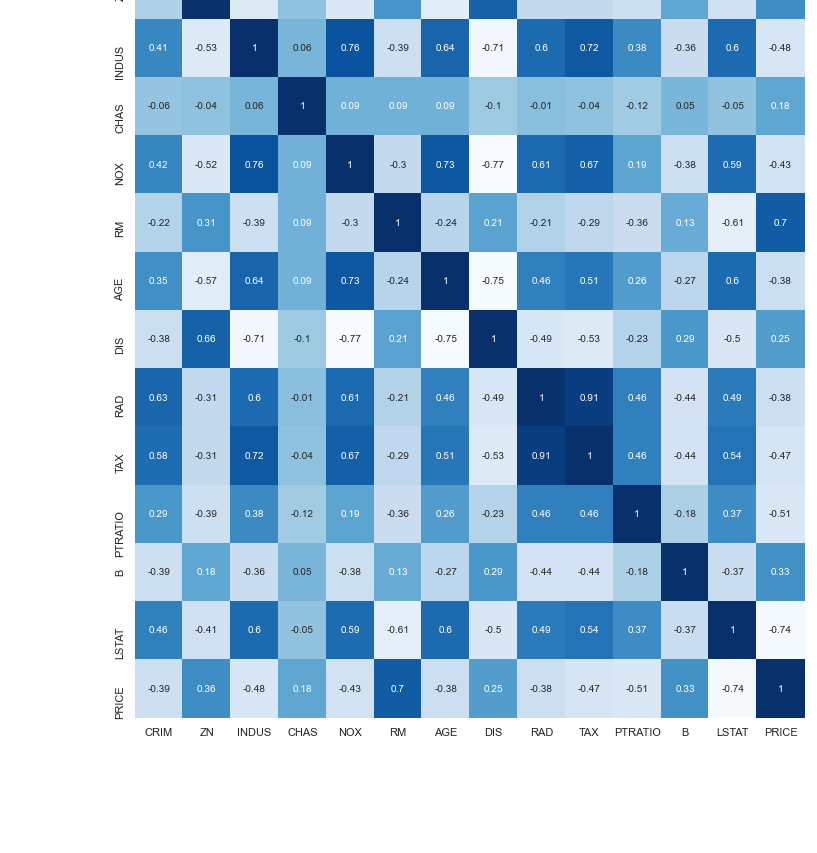

In [21]:
# Plot correlation matrix from the pd.DataFrame
corr = boston_df.corr().round(2)
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='Blues')

----
<a id='s3'></a>
# 3. Preprocessing

- Data Cleaning
- Feature Engineering
- Data Transforms / 

### Null Values

In [ ]:
def check_null_values(df):
    """Check if there are missing values in a pd.DataFrame."""
    n_col = len(df.columns)
    null_counts = np.array(df.isnull().sum())
    if np.any(null_counts) == False:
        print("The DataFrame has no null values.")
    else:
        return df.isnull().sum()

----
<a id='s4'></a>
# 4. 

### Ex: Train-test split

In [46]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [54]:
X, Y = df.iloc[:, :4], df.iloc[:, -1] # Specify feature and target matrix

# Perform train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.3, random_state=7)

----
<a id='s5'></a>
# 5. 

----
<a id='s6'></a>
# 6. 

----
Teleport to [Table of Contents](#TOC)